In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# prompt: i want to upload file

from google.colab import files

uploaded = files.upload()

Saving emotion_dataset.csv to emotion_dataset (1).csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import io

# Load the data from the uploaded dictionary
try:
    # Assuming the file name is 'emotion_dataset.csv'
    for fn in uploaded.keys():
        if fn.endswith('.csv'):
            df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
            print(f"DataFrame loaded successfully from {fn}:")
            display(df.head())
            break # Assuming only one CSV is uploaded
    if 'df' not in locals():
        print("Error: No CSV file found in the uploaded files.")

except KeyError:
    print("Error: Could not access uploaded files dictionary.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame loaded successfully from emotion_dataset (1).csv:


,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
# Assuming your DataFrame has 'Emotion' and 'Text' columns
if 'df' in locals() and not df.empty:
    df = df[['Emotion', 'Text']].dropna()
    print("\nDataFrame after selecting columns and dropping NaNs:")
    display(df.head())
else:
    print("DataFrame not loaded or is empty. Please check the previous cell.")


DataFrame after selecting columns and dropping NaNs:


,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


<ipython-input-5-815525854>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette="magma")


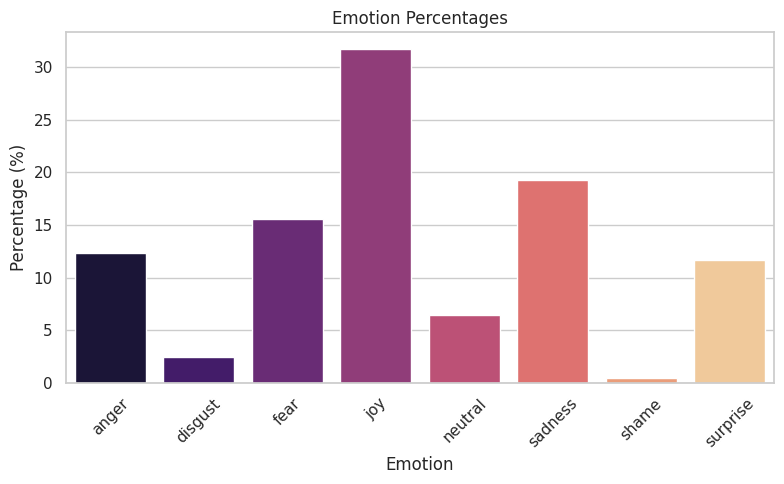

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals() and not df.empty:
    # Emotion percentages
    percentages = (df['Emotion'].value_counts(normalize=True).sort_index()) * 100

    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.barplot(x=percentages.index, y=percentages.values, palette="magma")
    plt.title("Emotion Percentages")
    plt.ylabel("Percentage (%)")
    plt.xlabel("Emotion")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not available for plotting. Please check previous cells.")

In [6]:
chat_words = {
    "afaik": "as far as i know",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "atk": "at the keyboard",
    "atm": "at the moment",
    "a3": "anytime, anywhere, anyplace",
    "bak": "back at keyboard",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bfn": "bye for now",
    "b4n": "bye for now",
    "brb": "be right back",
    "brt": "be right there",
    "btw": "by the way",
    "b4": "before",
    "cu": "see you",
    "cul8r": "see you later",
    "cya": "see you",
    "faq": "frequently asked questions",
    "fc": "fingers crossed",
    "fwiw": "for what it's worth",
    "fyi": "for your information",
    "gal": "get a life",
    "gg": "good game",
    "gn": "good night",
    "gmta": "great minds think alike",
    "gr8": "great!",
    "g9": "genius",
    "ic": "i see",
    "icq": "i seek you (also a chat program)",
    "ilu": "i love you",
    "imho": "in my honest/humble opinion",
    "imo": "in my opinion",
    "iow": "in other words",
    "irl": "in real life",
    "kiss": "keep it simple, stupid",
    "ldr": "long distance relationship",
    "lmao": "laugh my a.. off",
    "lol": "laughing out loud",
    "ltns": "long time no see",
    "l8r": "later",
    "mte": "my thoughts exactly",
    "m8": "mate",
    "nrn": "no reply necessary",
    "oic": "oh i see",
    "pita": "pain in the a..",
    "prt": "party",
    "prw": "parents are watching",
    "qpsa?": "que pasa?",
    "rofl": "rolling on the floor laughing",
    "rofLOL": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my a.. off",
    "sk8": "skate",
    "stats": "your sex and age",
    "asl": "age, sex, location",
    "thx": "thank you",
    "ttfn": "ta-ta for now!",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours for ever",
    "wb": "welcome back",
    "wtf": "what the f...",
    "wtg": "way to go!",
    "wuf": "where are you from?",
    "w8": "wait...",
    "7k": "sick:-d laugher",
    "tfw": "that feeling when",
    "mfw": "my face when",
    "mrw": "my reaction when",
    "ifyp": "i feel your pain",
    "tntl": "trying not to laugh",
    "jk": "just kidding",
    "idc": "i don't care",
    "ily": "i love you",
    "imu": "i miss you",
    "adih": "another day in hell",
    "zzz": "sleeping, bored, tired",
    "wywh": "wish you were here",
    "time": "tears in my eyes",
    "bae": "before anyone else",
    "fimh": "forever in my heart",
    "bsaaw": "big smile and a wink",
    "bwl": "bursting with laughter",
    "bff": "best friends forever",
    "csl": "can't stop laughing"
}

In [7]:
# Function to detect chat words
def contains_chat_words(text):
    words = str(text).lower().split()
    return any(word in chat_words for word in words)

# Apply to DataFrame
if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['has_chat_words'] = df['Text'].apply(contains_chat_words)

    # View rows with chat words
    print(f"Rows with chat words: {df['has_chat_words'].sum()}")
    display(df[df['has_chat_words']].head())
else:
    print("DataFrame not available or 'Text' column missing for chat word detection.")

Rows with chat words: 2227


,Emotion,Text,has_chat_words
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,True
49,joy,Welp time to study for the next few days...,True
56,fear,“@mattmosley: This is the shakiest 14-point le...,True
66,fear,results from seeing ourselves walk into a situ...,True
84,joy,Now time to unpack and finish some homework,True


In [8]:
def replace_chat_words(text, chat_dict):
    words = str(text).split()
    new_words = []
    for word in words:
        key = word.lower()
        if key in chat_dict:
            new_words.append(chat_dict[key])
        else:
            new_words.append(word)
    return " ".join(new_words)

if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['content_expanded'] = df['Text'].apply(lambda x: replace_chat_words(x, chat_words))
    display(df.head(10))
else:
    print("DataFrame not available or 'Text' column missing for chat word replacement.")

,Emotion,Text,has_chat_words,content_expanded
0,neutral,Why ?,False,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,False,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,False,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,False,Such an eye ! The true hazel eye-and so brilli...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,True,@Iluvmiasantos ugh babe.. hugggzzz for you .! ...
5,fear,I'm expecting an extremely important phonecall...,False,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...,False,.Couldnt wait to see them live. If missing the...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,False,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...,False,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,False,@1116am Drummer Boy bij op verzoek van @BiemOo...


In [9]:
# Replace 'Text' with the expanded version and drop the temporary column
if 'df' in locals() and not df.empty and 'content_expanded' in df.columns:
    df['Text'] = df['content_expanded']
    df.drop(['has_chat_words', 'content_expanded'], axis=1, errors='ignore', inplace=True)
    display(df.head(10))
else:
    print("DataFrame not available or 'content_expanded' column missing for column replacement.")

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brilli...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for you .! ...
5,fear,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing the...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemOo...


In [10]:
def remove_at_words(text):
    return ' '.join(word for word in str(text).split() if '@' not in word)

if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['Text'] = df['Text'].apply(remove_at_words)
    display(df.head())
else:
    print("DataFrame not available or 'Text' column missing for removing '@' words.")

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brilli...
4,joy,ugh babe.. hugggzzz for you .! babe naamazed n...


In [11]:
import nltk
from nltk.corpus import stopwords

try:
    nltk.download('stopwords')
    stop = stopwords.words('english')
    print("Stopwords downloaded successfully.")
except Exception as e:
    print(f"Error downloading stopwords: {e}")

Stopwords downloaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
if 'df' in locals() and not df.empty and 'Text' in df.columns and 'stop' in locals():
    df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
    display(df.head(10))
else:
    print("DataFrame, 'Text' column, or stopwords not available for stopword removal.")

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such eye ! The true hazel eye-and brilliant ! ...
4,joy,ugh babe.. hugggzzz .! babe naamazed nga ako e...
5,fear,I'm expecting extremely important phonecall mi...
6,sadness,.Couldnt wait see live. If missing NH7 wasnt p...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,Drummer Boy bij op verzoek van . : welke uitvo...


In [13]:
if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['Text'] = df['Text'].str.lower()
    display(df.head())
else:
    print("DataFrame not available or 'Text' column missing for lowercasing.")

,Emotion,Text
0,neutral,why ?
1,joy,sage act upgrade list tommorow.
2,sadness,on the way to my homegirl baby funeral!!! man ...
3,joy,such eye ! the true hazel eye-and brilliant ! ...
4,joy,ugh babe.. hugggzzz .! babe naamazed nga ako e...


In [14]:
import re

if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['Text'] = df['Text'].apply(lambda x: re.sub(r'\d+', '', x))
    display(df.head())
else:
     print("DataFrame not available or 'Text' column missing for number removal.")

,Emotion,Text
0,neutral,why ?
1,joy,sage act upgrade list tommorow.
2,sadness,on the way to my homegirl baby funeral!!! man ...
3,joy,such eye ! the true hazel eye-and brilliant ! ...
4,joy,ugh babe.. hugggzzz .! babe naamazed nga ako e...


In [15]:
if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)
    display(df.head())
else:
    print("DataFrame not available or 'Text' column missing for multiple space removal.")

,Emotion,Text
0,neutral,why ?
1,joy,sage act upgrade list tommorow.
2,sadness,on the way to my homegirl baby funeral!!! man ...
3,joy,such eye ! the true hazel eye-and brilliant ! ...
4,joy,ugh babe.. hugggzzz .! babe naamazed nga ako e...


In [16]:
if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)
    display(df.head())
else:
    print("DataFrame not available or 'Text' column missing for punctuation removal.")

,Emotion,Text
0,neutral,why
1,joy,sage act upgrade list tommorow
2,sadness,on the way to my homegirl baby funeral man i h...
3,joy,such eye the true hazel eyeand brilliant reg...
4,joy,ugh babe hugggzzz babe naamazed nga ako e bab...


In [17]:
if 'df' in locals() and not df.empty and 'Text' in df.columns:
    df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)
    display(df.head())
else:
    print("DataFrame not available or 'Text' column missing for URL removal.")

,Emotion,Text
0,neutral,why
1,joy,sage act upgrade list tommorow
2,sadness,on the way to my homegirl baby funeral man i h...
3,joy,such eye the true hazel eyeand brilliant reg...
4,joy,ugh babe hugggzzz babe naamazed nga ako e bab...


In [18]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

try:
    nltk.download('punkt')  # required for word_tokenize
    nltk.download('punkt_tab') # required by word_tokenize internally sometimes

    # Initialize the PorterStemmer
    stemmer = PorterStemmer()

    # Function to apply stemming to a text
    def apply_stemming(text):
        words = word_tokenize(text)
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)

    if 'df' in locals() and not df.empty and 'Text' in df.columns:
        # Apply stemming to the 'text' column
        df['Text'] = df['Text'].apply(apply_stemming)
        print("Stemming applied successfully.")
        display(df.head())
    else:
        print("DataFrame not available or 'Text' column missing for stemming.")

except Exception as e:
    print(f"An error occurred during stemming: {e}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Stemming applied successfully.


,Emotion,Text
0,neutral,whi
1,joy,sage act upgrad list tommorow
2,sadness,on the way to my homegirl babi funer man i hat...
3,joy,such eye the true hazel eyeand brilliant regul...
4,joy,ugh babe hugggzzz babe naamaz nga ako e babe e...


In [19]:
if 'df' in locals() and not df.empty and 'Emotion' in df.columns:
    print("Unique emotions in the dataset:", df['Emotion'].unique())
else:
    print("DataFrame not available or 'Emotion' column missing.")

Unique emotions in the dataset: ['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger' 'shame' 'disgust']


In [20]:
from sklearn.model_selection import train_test_split

if 'df' in locals() and not df.empty and 'Text' in df.columns and 'Emotion' in df.columns:
    X = df['Text']
    y = df['Emotion']

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the shapes of the training and testing sets
    print("The shape of X_train is ", X_train.shape)
    print("The shape of X_test is ", X_test.shape)
    print("The shape of y_train is", y_train.shape)
    print("The shape of y_test is", y_test.shape)
else:
    print("DataFrame not available or required columns missing for train-test split.")

The shape of X_train is  (27833,)
The shape of X_test is  (6959,)
The shape of y_train is (27833,)
The shape of y_test is (6959,)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming df has 'Text' and 'Emotion' columns
X = df['Text']
y = df['Emotion']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.63      0.55      0.59       836
     disgust       0.73      0.12      0.20       202
        fear       0.74      0.63      0.68      1104
         joy       0.60      0.81      0.69      2214
     neutral       0.71      0.51      0.59       481
     sadness       0.58      0.59      0.59      1327
       shame       0.79      0.48      0.59        23
    surprise       0.58      0.41      0.48       772

    accuracy                           0.62      6959
   macro avg       0.67      0.51      0.55      6959
weighted avg       0.63      0.62      0.61      6959



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data
X = df['Text']
y = df['Emotion']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
lr_preds = lr_model.predict(X_test_vec)

print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)

print("Naive Bayes Results:")
print(classification_report(y_test, nb_preds))


Logistic Regression Results:
              precision    recall  f1-score   support

       anger       0.63      0.55      0.59       836
     disgust       0.73      0.12      0.20       202
        fear       0.74      0.63      0.68      1104
         joy       0.60      0.81      0.69      2214
     neutral       0.71      0.51      0.59       481
     sadness       0.58      0.59      0.59      1327
       shame       0.79      0.48      0.59        23
    surprise       0.58      0.41      0.48       772

    accuracy                           0.62      6959
   macro avg       0.67      0.51      0.55      6959
weighted avg       0.63      0.62      0.61      6959

Naive Bayes Results:
              precision    recall  f1-score   support

       anger       0.72      0.41      0.53       836
     disgust       0.50      0.00      0.01       202
        fear       0.80      0.52      0.63      1104
         joy       0.49      0.91      0.63      2214
     neutral       0.87     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

if 'X_train' in locals() and 'X_test' in locals():
    # Combine train and test texts for tokenizer fitting (to keep consistent vocab)
    all_texts = list(X_train) + list(X_test)

    # Initialize tokenizer with max vocab size 60000 (you can adjust this)
    tokenizer = Tokenizer(num_words=60000)
    tokenizer.fit_on_texts(all_texts)

    # Convert texts to sequences of integers
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)

    # Find max sequence length in training data
    maxlen = max(len(seq) for seq in X_train_seq)
    print("Maximum sequence length in training data:", maxlen)

    # Pad sequences
    X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
    X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

    print("\nX_train_padded shape:", X_train_pad.shape)
    print("X_test_padded shape:", X_test_pad.shape)

else:
    print("X_train or X_test not available. Please run the train-test split cell.")

Maximum sequence length in training data: 126

X_train_padded shape: (27833, 126)
X_test_padded shape: (6959, 126)


In [24]:
from sklearn.preprocessing import LabelEncoder

if 'y_train' in locals() and 'y_test' in locals():
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the training labels
    y_train_encoded = label_encoder.fit_transform(y_train)

    # Transform the testing labels
    y_test_encoded = label_encoder.transform(y_test)

    print("Encoded training labels shape:", y_train_encoded.shape)
    print("Encoded testing labels shape:", y_test_encoded.shape)
    print("\nFirst 10 encoded training labels:", y_train_encoded[:10])
    print("First 10 encoded testing labels:", y_test_encoded[:10])
    print("\nLabel classes:", label_encoder.classes_)

else:
    print("y_train or y_test not available. Please run the train-test split cell.")

Encoded training labels shape: (27833,)
Encoded testing labels shape: (6959,)

First 10 encoded training labels: [3 4 2 0 7 1 3 2 5 7]
First 10 encoded testing labels: [5 0 5 3 0 3 2 4 4 3]

Label classes: ['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'shame' 'surprise']


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, BatchNormalization, Dropout, Dense, Input
from tensorflow.keras.regularizers import l2 # Import L2 regularization

if 'maxlen' in locals() and 'tokenizer' in locals():
    input_size = len(tokenizer.word_index) + 1  # vocab size + 1 for padding
    max_sequence_length = maxlen

    model = Sequential()
    model.add(Input(shape=(max_sequence_length,)))  # Specify input shape here
    model.add(Embedding(input_dim=input_size, output_dim=100))
    model.add(Bidirectional(LSTM(128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.6)) # Increased dropout rate
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001))) # Added L2 regularization
    model.add(Dropout(0.6)) # Increased dropout rate
    # The number of output neurons should match the number of unique emotion classes
    if 'label_encoder' in locals():
        num_classes = len(label_encoder.classes_)
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.summary()
    else:
        print("LabelEncoder not available. Cannot determine number of output classes for the model.")
        print("Please run the cell that encodes the labels.")

else:
    print("maxlen or tokenizer not available. Please run the tokenization cell.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 126, 100)       │     2,712,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,965,388 (11.31 MB)

 Trainable params: 2,964,876 (11.31 MB)

 Non-trainable params: 512 (2.00 KB)

In [26]:
if 'history' in locals():
    # Get the training accuracy from the history object
    training_accuracy = history.history['accuracy']

    # Print the training accuracy for each epoch
    print("\nTraining Accuracy per Epoch:")
    for epoch, accuracy in enumerate(training_accuracy):
        print(f"Epoch {epoch + 1}: Training Accuracy = {accuracy:.4f}")

    # If you want the final training accuracy after the last epoch
    final_training_accuracy = training_accuracy[-1]
    print(f"\nFinal Training Accuracy: {final_training_accuracy:.4f}")

    # Remind the user of the test accuracy from the last evaluation
    # Find the test accuracy from the epoch with the best validation loss
    best_val_loss_epoch = np.argmin(history.history['val_loss'])
    best_test_accuracy = history.history['val_accuracy'][best_val_loss_epoch]

    print(f"\nTest Accuracy (from best validation epoch): {best_test_accuracy:.4f}")

else:
    print("Training history not available. Please run the model training cell.")

Training history not available. Please run the model training cell.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

if 'model' in locals() and 'X_train_pad' in locals() and 'y_train_encoded' in locals() and 'X_test_pad' in locals() and 'y_test_encoded' in locals():
    early_stop = EarlyStopping(patience=3, restore_best_weights=True)

    history = model.fit(
        X_train_pad,
        y_train_encoded,  # Use encoded training labels
        epochs=20,
        batch_size=32,
        validation_data=(X_test_pad, y_test_encoded),  # Use encoded testing labels
        callbacks=[early_stop]
    )
    print("\nModel training finished.")

else:
    print("Model, padded training/testing data, or encoded labels not available for training.")
    print("Please run the preceding cells to define these variables.")

Epoch 1/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 361s 410ms/step - accuracy: 0.3871 - loss: 1.7307 - val_accuracy: 0.5676 - val_loss: 1.2578
Epoch 2/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 366s 420ms/step - accuracy: 0.6494 - loss: 1.1036 - val_accuracy: 0.5495 - val_loss: 1.4617
Epoch 3/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 384s 423ms/step - accuracy: 0.7292 - loss: 0.8598 - val_accuracy: 0.5502 - val_loss: 1.3826
Epoch 4/20
770/870 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.7831 - loss: 0.7040

In [ ]:
import pickle

# Save Keras model
model.save('emotion_model.h5')

# Save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save maxlen
with open('maxlen.pkl', 'wb') as f:
    pickle.dump(maxlen, f)

In [ ]:
from google.colab import files

files.download('emotion_model.h5')
files.download('tokenizer.pkl')
files.download('label_encoder.pkl')
files.download('maxlen.pkl')


In [ ]:
if 'model' in locals() and 'X_test_pad' in locals() and 'y_test_encoded' in locals():
    # Final evaluation
    loss, accuracy = model.evaluate(X_test_pad, y_test_encoded) # Use encoded testing labels
    print(f"\nTest Accuracy: {accuracy:.4f}")
else:
    print("Model, padded testing data, or encoded testing labels not available for evaluation.")
    print("Please run the preceding cells to define these variables.")

In [ ]:
# Re-create the label mapping if label_encoder exists
if 'label_encoder' in globals():
    label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
    print("Label mapping is ready.")
else:
    print("label_encoder is not available.")


def predict_emotion(text):
    if not label_mapping:
        return "Label mapping not available."
    if 'tokenizer' not in globals():
        return "Tokenizer not defined."
    if 'maxlen' not in globals():
        return "Maxlen not defined."
    if 'model' not in globals():
        return "Model not defined."

    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=maxlen, padding='post')
    pred = model.predict(padded)
    pred_class = np.argmax(pred)
    return label_mapping.get(pred_class, "Unknown")

# Example usage:
text = "I wish i could come"
print("Predicted Emotion:", predict_emotion(text))

In [ ]:
test_sentences = [
    "I'm feeling really happy and excited today!",
    "I can't stand this anymore, it's so frustrating.",
    "Nothing matters, everything feels empty.",
    "You are the best thing that ever happened to me.",
    "I was not expecting that! What a surprise!"
]

for sentence in test_sentences:
    print(f"Text: {sentence}")
    print("Predicted Emotion:", predict_emotion(sentence))
    print("-" * 40)


In [ ]:
test_sentences = [
    "I'm scared something bad will happen.",          # fear
    "This is the best day of my life!",               # joy
    "I'm so bored, nothing interests me anymore.",    # boredom
    "You betrayed me. I hate you.",                   # anger
    "Everything is fine, just a normal day.",         # neutral
    "I feel so alone and sad today.",                 # sadness
    "Wow, I can't believe this actually worked!",     # surprise
    "She means the world to me. I truly love her.",   # love
    "Ugh, this is absolutely disgusting!",            # disgust
    "I regret what I said, I'm ashamed of myself."    # shame
]

for sentence in test_sentences:
    print(f"Text: {sentence}")
    print("Predicted Emotion:", predict_emotion(sentence))
    print("-" * 40)
